In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:/Users/dell/OneDrive/Desktop/Python/telecom_ran_dataset.csv")

In [3]:
df.head()

,Site_ID,Technology,Vendor,Region,RRC_Success_Rate,ERAB_Drop_Rate,DL_Throughput,UL_Throughput,PRB_Utilization_DL,PRB_Utilization_UL,...,Critical_Alarms_Count,Major_Alarms_Count,VSWR_Alarm,GPS_Sync_Alarm,Transmission_Alarm,CPU_Utilization,Memory_Usage,DL_User_Count,UL_User_Count,Cell_Health
0,SITE_0,4G,Nokia,Chennai,94.041007,4.049301,118.180624,13.122588,70.277901,68.071908,...,1,7,1,0,1,88.144449,38.442829,93,246,0
1,SITE_1,3G,Huawei,Chennai,92.997656,4.736976,49.025471,43.448329,46.213575,7.678609,...,3,8,1,1,0,62.523026,81.981987,245,115,0
2,SITE_2,5G,Ericsson,UPE,92.008475,1.686701,50.195025,9.066793,36.820617,15.336447,...,1,8,0,0,1,78.870420,19.452444,270,184,0
3,SITE_3,5G,Nokia,Delhi,78.983305,3.624906,5.455431,21.341122,66.293025,58.812236,...,3,2,0,1,1,10.310300,34.853480,227,27,0
4,SITE_4,4G,Huawei,UPE,75.204402,2.694065,30.265293,1.702214,23.937182,81.417039,...,3,4,1,1,1,86.550058,72.273649,240,103,0


In [31]:
df.isnull().sum()

Site_ID                  0
Technology               0
Vendor                   0
Region                   0
RRC_Success_Rate         0
ERAB_Drop_Rate           0
DL_Throughput            0
UL_Throughput            0
PRB_Utilization_DL       0
PRB_Utilization_UL       0
RSRP_Avg                 0
RSRQ_Avg                 0
SINR_Avg                 0
CQI_Avg                  0
Critical_Alarms_Count    0
Major_Alarms_Count       0
VSWR_Alarm               0
GPS_Sync_Alarm           0
Transmission_Alarm       0
CPU_Utilization          0
Memory_Usage             0
DL_User_Count            0
UL_User_Count            0
Cell_Health              0
dtype: int64

Text(0.5, 1.0, 'Cell_Health')

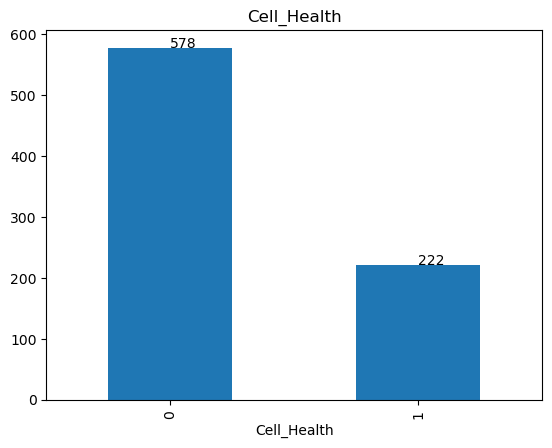

In [42]:
count=df["Cell_Health"].value_counts()
ax=count.plot(kind="bar")
for i ,j in enumerate (count):
    plt.text(i,j,j)
plt.title("Cell_Health")


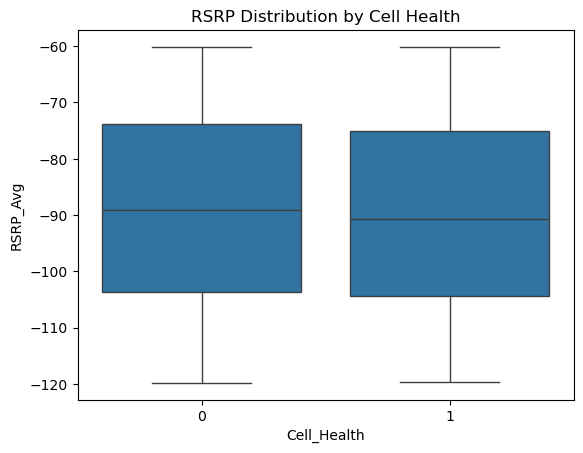

In [43]:
sns.boxplot(x='Cell_Health', y='RSRP_Avg', data=df)
plt.title("RSRP Distribution by Cell Health")
plt.show()

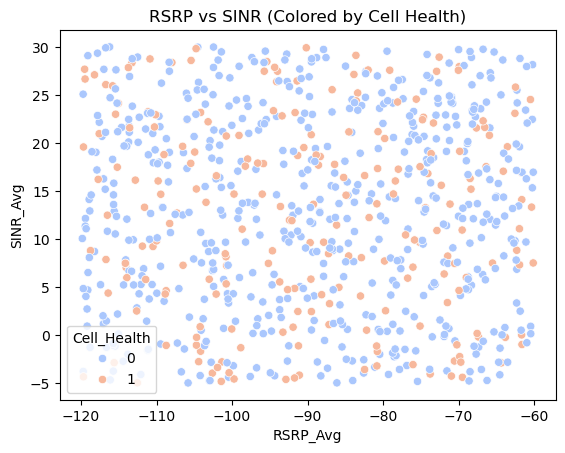

In [45]:
sns.scatterplot(x='RSRP_Avg', y='SINR_Avg',
                hue='Cell_Health', data=df, palette="coolwarm")
plt.title("RSRP vs SINR (Colored by Cell Health)")
plt.show()

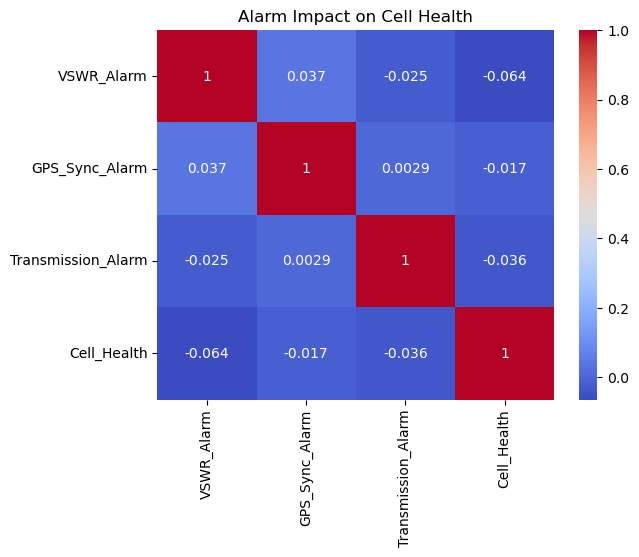

In [46]:
alarm_cols = ["VSWR_Alarm", "GPS_Sync_Alarm", "Transmission_Alarm"]

sns.heatmap(df[alarm_cols + ['Cell_Health']].corr(), annot=True, cmap="coolwarm")
plt.title("Alarm Impact on Cell Health")
plt.show()

In [6]:
x=df[['RRC_Success_Rate','ERAB_Drop_Rate', 'DL_Throughput', 'UL_Throughput',
       'PRB_Utilization_DL', 'PRB_Utilization_UL', 'RSRP_Avg', 'RSRQ_Avg',
       'SINR_Avg', 'CQI_Avg', 'Critical_Alarms_Count', 'Major_Alarms_Count',
       'VSWR_Alarm', 'GPS_Sync_Alarm', 'Transmission_Alarm', 'CPU_Utilization',
       'Memory_Usage', 'DL_User_Count', 'UL_User_Count']]

In [7]:
x.head()

,RRC_Success_Rate,ERAB_Drop_Rate,DL_Throughput,UL_Throughput,PRB_Utilization_DL,PRB_Utilization_UL,RSRP_Avg,RSRQ_Avg,SINR_Avg,CQI_Avg,Critical_Alarms_Count,Major_Alarms_Count,VSWR_Alarm,GPS_Sync_Alarm,Transmission_Alarm,CPU_Utilization,Memory_Usage,DL_User_Count,UL_User_Count
0,94.041007,4.049301,118.180624,13.122588,70.277901,68.071908,-84.759133,-5.454989,12.139641,12.456413,1,7,1,0,1,88.144449,38.442829,93,246
1,92.997656,4.736976,49.025471,43.448329,46.213575,7.678609,-109.547359,-10.978182,21.689989,9.971958,3,8,1,1,0,62.523026,81.981987,245,115
2,92.008475,1.686701,50.195025,9.066793,36.820617,15.336447,-62.226502,-15.661049,24.168217,5.345573,1,8,0,0,1,78.870420,19.452444,270,184
3,78.983305,3.624906,5.455431,21.341122,66.293025,58.812236,-109.465213,-8.514051,7.180944,10.185556,3,2,0,1,1,10.310300,34.853480,227,27
4,75.204402,2.694065,30.265293,1.702214,23.937182,81.417039,-109.346525,-10.776217,26.225352,3.946464,3,4,1,1,1,86.550058,72.273649,240,103


In [10]:
y=df[["Cell_Health"]]

In [11]:
y

,Cell_Health
0,0
1,0
2,0
3,0
4,0
...,...
795,0
796,0
797,0
798,0


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [16]:
#FS
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_scaled=sc.transform(x_train)
x_test_scaled=sc.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr_scaled =LogisticRegression()



lr.fit(x_train,y_train)

lr_scaled.fit(x_train_scaled,y_train)


C:\Users\dell\Atul\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Atul\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\Atul\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

LogisticRegression()

In [29]:
from sklearn.svm import SVC
svc = SVC()
svc_scaled = SVC()

svc.fit(x_train, y_train)
svc_scaled.fit(x_train_scaled, y_train)

print(accuracy_score(y_test, svc.predict(x_test)))
print(accuracy_score(y_test, svc_scaled.predict(x_test_scaled)))

0.7375
0.7375


C:\Users\dell\Atul\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Atul\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
from sklearn.neighbors import KNeighborsClassifier


# create model
knn = KNeighborsClassifier(n_neighbors=5)

# train on scaled data
knn.fit(x_train_scaled, y_train)

# predict
y_pred_knn = knn.predict(x_test_scaled)

# accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.7125


C:\Users\dell\Atul\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:

# -------------------------
# 4. Logistic Regression
# -------------------------
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# -------------------------
# 5. SVM (use scaled data)
# -------------------------
svc = SVC()
svc.fit(x_train_scaled, y_train)
y_pred_svm = svc.predict(x_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

# -------------------------
# 6. KNN (use scaled data)
# -------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)
y_pred_knn = knn.predict(x_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)

# -------------------------
# 7. Print Accuracy of Each Model
# -------------------------
print("Logistic Regression Accuracy :", acc_lr)
print("SVM Accuracy                 :", acc_svm)
print("KNN Accuracy                 :", acc_knn)

# -------------------------
# 8. Which model is best?
# -------------------------
accuracies = {
    "Logistic Regression": acc_lr,
    "SVM": acc_svm,
    "KNN": acc_knn
}

best_model = max(accuracies, key=accuracies.get)
print("\nBest Model is:", best_model)

Logistic Regression Accuracy : 0.73125
SVM Accuracy                 : 0.7375
KNN Accuracy                 : 0.7125

Best Model is: SVM


C:\Users\dell\Atul\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\Atul\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\Atul\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =